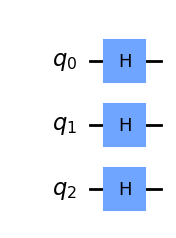

In [4]:
#superposition defines the probabilities of states connected while tensor product, calculated by multiplying each enrty in m1 with m2, defines the state of two independent qubits
from qiskit import QuantumCircuit, Aer, transpile, execute, assemble
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np
#visualizing the tensor product of three qubits after they all are H gated, means now the 0 are + states
qc = QuantumCircuit(3)
for qubit in range(3):
    qc.h(qubit)
qc.draw()
#need to save qc as a statevector if you want to use it later as such


In [8]:
#let us see the statevector
svsim = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, svsim)
job = execute(transpiled_qc, svsim)
result = job.result()
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{|+++>} = ")

<IPython.core.display.Latex object>

In [31]:
'''
to compute the effect of two gate matrices on two qubits, we take the tensor product of the qubits and the tensor product of the gates
ie H|Q>xX|q> = (HxX)(|Qq>.
no need to calculate. The Aer simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:
use qc.save_unitary()
'''
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.save_unitary()
svsim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, svsim)
job = execute(transpiled_qc, svsim)
result = job.result()
final_state = result.get_unitary()
array_to_latex(final_state, prefix="\\text{Circuit Matrix = }")
#need to do this for every sim we run bcz transpile

<IPython.core.display.Latex object>

In [26]:
#applying a gate to only one qubit would mean tensoring the gate with I matrix before they can be applied to the tensored states. 
#constructing a bell state(11 with 0.5 p and 00 with 0.5p) from 4D CNOT Gate. in quantum last best comes first so q1 becomes control and q0 target
qc = QuantumCircuit(2)
qc.h(0)
qc.draw()
qc.save_statevector()

In [31]:
#seeing result so need to construct a statevector
sim = Aer.get_backend('aer_simulator')
transpiled = transpile(qc, sim)
job = execute(transpiled, sim)
result = job.result()
final = result.get_statevector()
array_to_latex(final, prefix="\\text{Bell State = }")
#RAN ALL THE CODE WITHOUT LOOKING UP ANYTHING!

<IPython.core.display.Latex object>

In [20]:
#do the same but apply cnot 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)


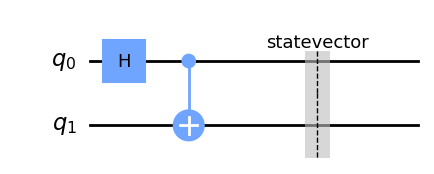

In [21]:
#dont miss the () after get fn or orders
qc.save_statevector()
qc.draw()

In [22]:
BS_sim = Aer.get_backend('aer_simulator')
transpiled = transpile(qc, BS_sim)
job = execute(transpiled, BS_sim)
result = job.result()
final = result.get_statevector()
array_to_latex(final, prefix="\\text{Bell State = }")


<IPython.core.display.Latex object>

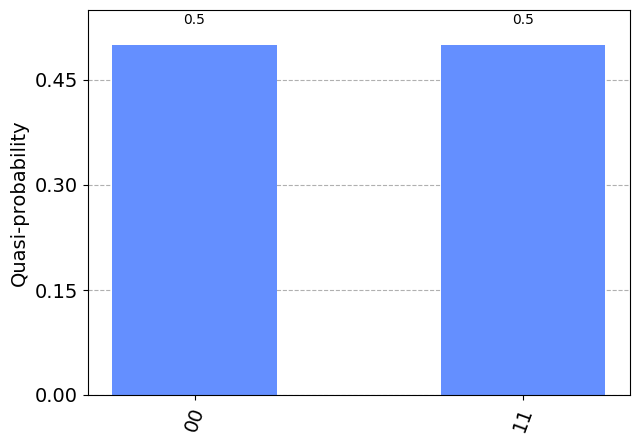

In [47]:
#bell state created!
plot_histogram(result.get_counts())

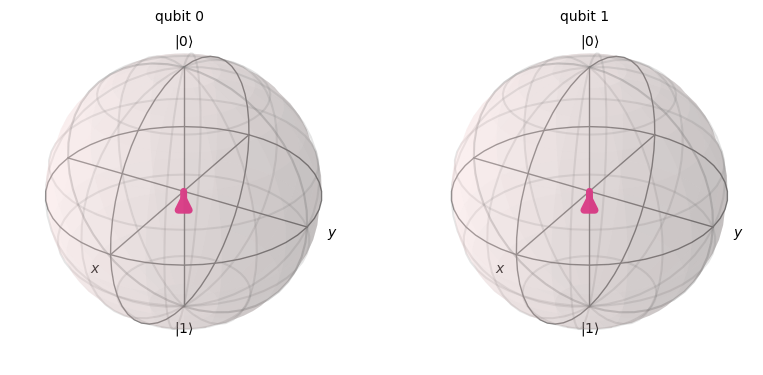

In [52]:
#plotting bloch multivector
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(final)

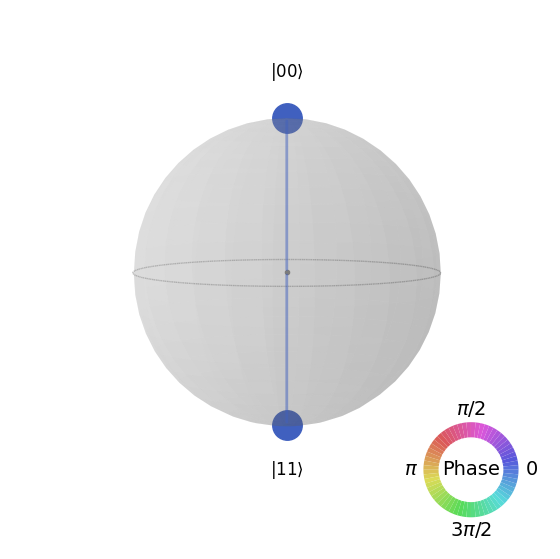

In [27]:
'''
It’s important to note that the measurement result is random, and the measurement statistics of one qubit are not affected by any operation on the other qubit. 
Because of this, there is no way to use shared quantum states to communicate. This is known as the no-communication theorem.[1]
we lose information when we try to plot our state on separate Bloch spheres:
Q-sphere, here each amplitude is represented by a blob on the surface of a sphere
'''
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final)